In [27]:
# Ignore Pandas warnings
import warnings
warnings.filterwarnings("ignore")

#import needed libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from copy import deepcopy
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('ggplot')
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import mglearn

In [26]:
#Import the dataset
df=pd.read_csv("/Users/michaeldiarra/Desktop/hospitalData.csv")
df.head()

Unnamed: 0 Provider ID  COMP_HIP_KNEE  MORT_30_AMI  MORT_30_CABG  \
0           0      010001            3.0         14.5           4.5   
1           1      010005            3.0         15.5           NaN   
2           2      010006            3.6         14.9           3.2   
3           3      010007            2.8          NaN           NaN   
4           4      010008            NaN          NaN           NaN   

   MORT_30_COPD  MORT_30_HF  MORT_30_PN  MORT_30_STK  PSI_10_POST_KIDNEY  \
0           8.9        12.5        16.2         13.7                0.65   
1          10.9        15.3        20.8         15.7                1.10   
2           8.8        13.2        17.2         17.2                1.28   
3           8.3        13.3        21.6         15.9                1.30   
4           8.0        12.9        15.7          NaN                 NaN   

               ...               H_HSP_RATING_LINEAR_SCORE  \
0              ...                                    83.0   
1              ...                                    88.0   
2              ...                                    84.0   
3              ...                                    85.0   
4              ...                                     NaN   

   H_QUIET_LINEAR_SCORE  H_RECMND_LINEAR_SCORE  \
0                  86.0                   84.0   
1                  85.0                   88.0   
2                  82.0                   84.0   
3                  86.0                   85.0   
4                   NaN                    NaN   

                      Hospital Name                     Address      City  \
0  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE    DOTHAN   
1     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH      BOAZ   
2    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET  FLORENCE   
3          MIZELL MEMORIAL HOSPITAL               702 N MAIN ST       OPP   
4       CRENSHAW COMMUNITY HOSPITAL         101 HOSPITAL CIRCLE   LUVERNE   

   State  ZIP Code  Number of Completed Surveys  Survey Response Rate Percent  
0     AL   36301.0                        506.0                          21.0  
1     AL   35957.0                       1135.0                          34.0  
2     AL   35631.0                        579.0                          22.0  
3     AL   36467.0                        185.0                          27.0  
4     AL   36049.0                         63.0                          31.0  

[5 rows x 38 columns]

In [33]:
# fill NaNs with mean values

df = df.fillna(df.mean())

In [34]:
DPD = df.loc[:,'COMP_HIP_KNEE':'H_RECMND_LINEAR_SCORE']
DPD.head()

COMP_HIP_KNEE  MORT_30_AMI  MORT_30_CABG  MORT_30_COPD  MORT_30_HF  \
0       3.000000    14.500000      4.500000           8.9        12.5   
1       3.000000    15.500000      3.230178          10.9        15.3   
2       3.600000    14.900000      3.200000           8.8        13.2   
3       2.800000    13.179386      3.230178           8.3        13.3   
4       2.596741    13.179386      3.230178           8.0        12.9   

   MORT_30_PN  MORT_30_STK  PSI_10_POST_KIDNEY  PSI_11_POST_RESP  \
0        16.2    13.700000            0.650000          6.020000   
1        20.8    15.700000            1.100000         12.170000   
2        17.2    17.200000            1.280000          7.190000   
3        21.6    15.900000            1.300000          9.460000   
4        15.7    14.289226            1.307723          8.037586   

   PSI_12_POSTOP_PULMEMB_DVT          ...            H_CLEAN_LINEAR_SCORE  \
0                   5.570000          ...                       83.000000   
1                   3.170000          ...                       87.000000   
2                   3.310000          ...                       79.000000   
3                   4.760000          ...                       86.000000   
4                   3.811502          ...                       87.965146   

   H_COMP_1_LINEAR_SCORE  H_COMP_2_LINEAR_SCORE  H_COMP_3_LINEAR_SCORE  \
0              87.000000              90.000000              75.000000   
1              91.000000              94.000000              85.000000   
2              89.000000              91.000000              83.000000   
3              89.000000              94.000000              84.000000   
4              91.375177              91.430434              85.736753   

   H_COMP_5_LINEAR_SCORE  H_COMP_6_LINEAR_SCORE  H_COMP_7_LINEAR_SCORE  \
0               70.00000              85.000000              79.000000   
1               81.00000              88.000000              81.000000   
2               76.00000              83.000000              80.000000   
3               79.00000              85.000000              80.000000   
4               79.20119              87.199207              81.911873   

   H_HSP_RATING_LINEAR_SCORE  H_QUIET_LINEAR_SCORE  H_RECMND_LINEAR_SCORE  
0                  83.000000             86.000000              84.000000  
1                  88.000000             85.000000              88.000000  
2                  84.000000             82.000000              84.000000  
3                  85.000000             86.000000              85.000000  
4                  88.447152             82.239445              88.086427  

[5 rows x 29 columns]

In [35]:
#Standardize the dataset - This ensures that all features have similar ranges.
from sklearn.preprocessing import StandardScaler
import numpy as np
stscaler = StandardScaler().fit(DPD)
data = stscaler.transform(DPD)

In [59]:
#Create DBSCAN Model
dbsc = DBSCAN(eps = .1, min_samples = 10).fit(data)
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

Text(0,0.5,'Feature 1 (scaled)')

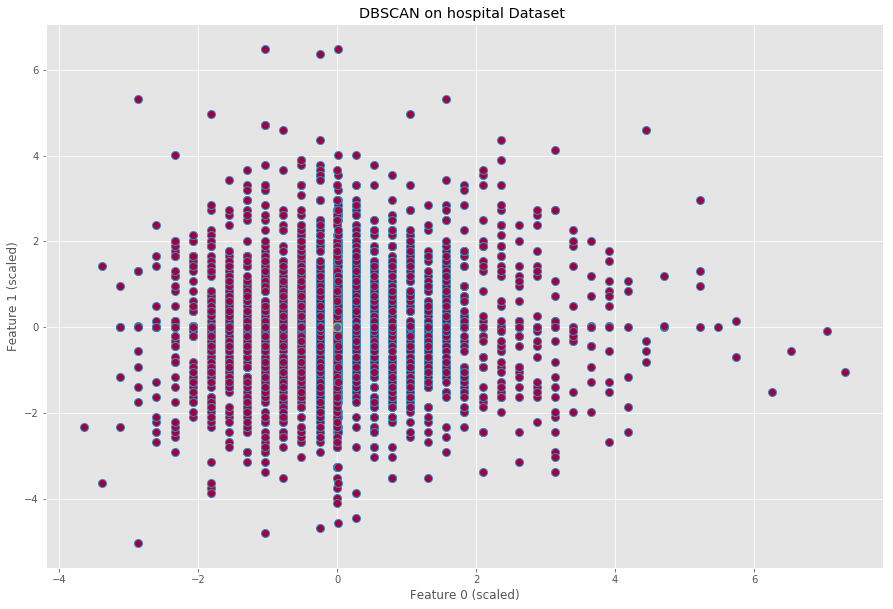

In [60]:
#Plot the DBSAN Cluster Map
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))
for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = data[class_member_mask & core_samples]
    plt.plot(xy[:,0],xy[:,1], 'o', markerfacecolor = color, markersize = 8)
    
    xy2 = data[class_member_mask & ~core_samples]
    plt.plot(xy2[:,0],xy2[:,1], 'o', markerfacecolor = color, markersize = 8)
plt.title("DBSCAN on hospital Dataset ")
plt.xlabel("Feature 0 (scaled)")
plt.ylabel("Feature 1 (scaled)")

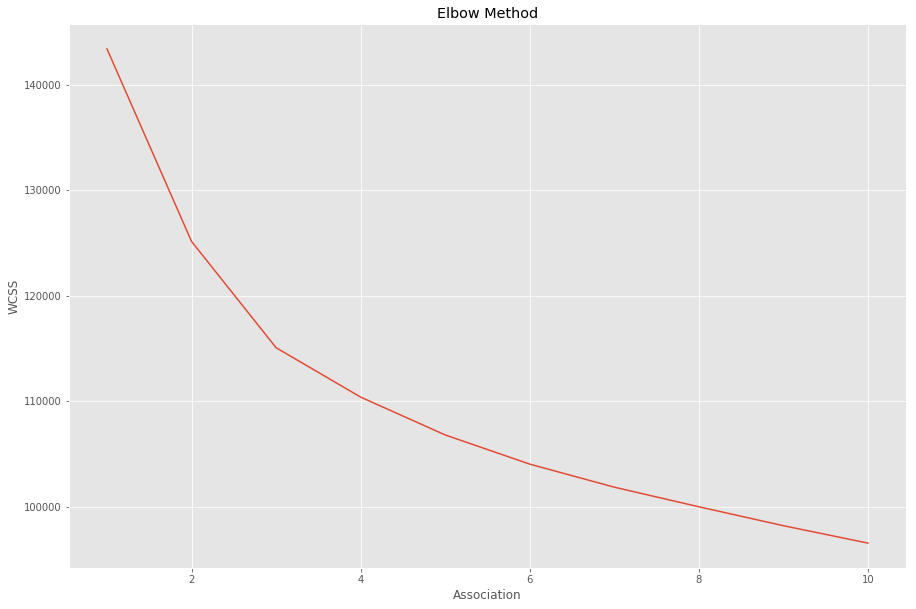

In [61]:
#Select the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Association')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [68]:
#Apply kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 500, 
                n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(data)

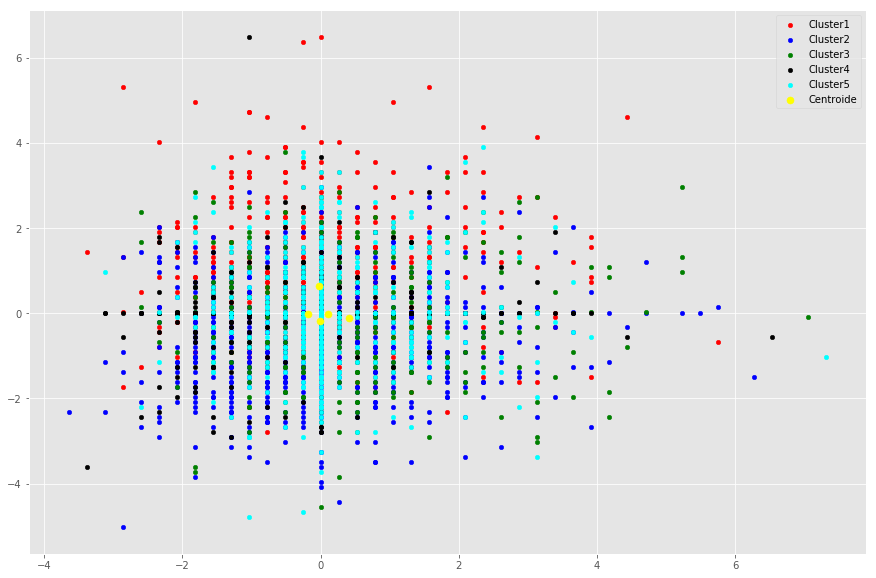

In [69]:
#Visualising the k-means clusters
plt.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], s = 20, 
            c = 'red', label = 'Cluster1')
plt.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], s = 20, 
            c = 'blue', label = 'Cluster2')
plt.scatter(data[y_kmeans == 2, 0], data[y_kmeans == 2, 1], s = 20, 
            c = 'green', label = 'Cluster3')
plt.scatter(data[y_kmeans == 3, 0], data[y_kmeans == 3, 1], s = 20, 
            c = 'black', label = 'Cluster4')
plt.scatter(data[y_kmeans == 4, 0], data[y_kmeans == 4, 1], s = 20, 
            c = 'cyan', label = 'Cluster5')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1], s = 50, 
            c = 'yellow', label = 'Centroide')

plt.legend()

In [80]:
#import needed libraries
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [81]:
## Create the categorical variable for Hospital Name
HospitalNames=df['Hospital Name'].astype('category').cat.codes

In [82]:
#Create t-SNE Model
model=TSNE(learning_rate=100)
Tsne_transformed=model.fit_transform(data)

In [85]:
## Create the categorical variable for Hospital Name
HospitalNames=df['Hospital Name']

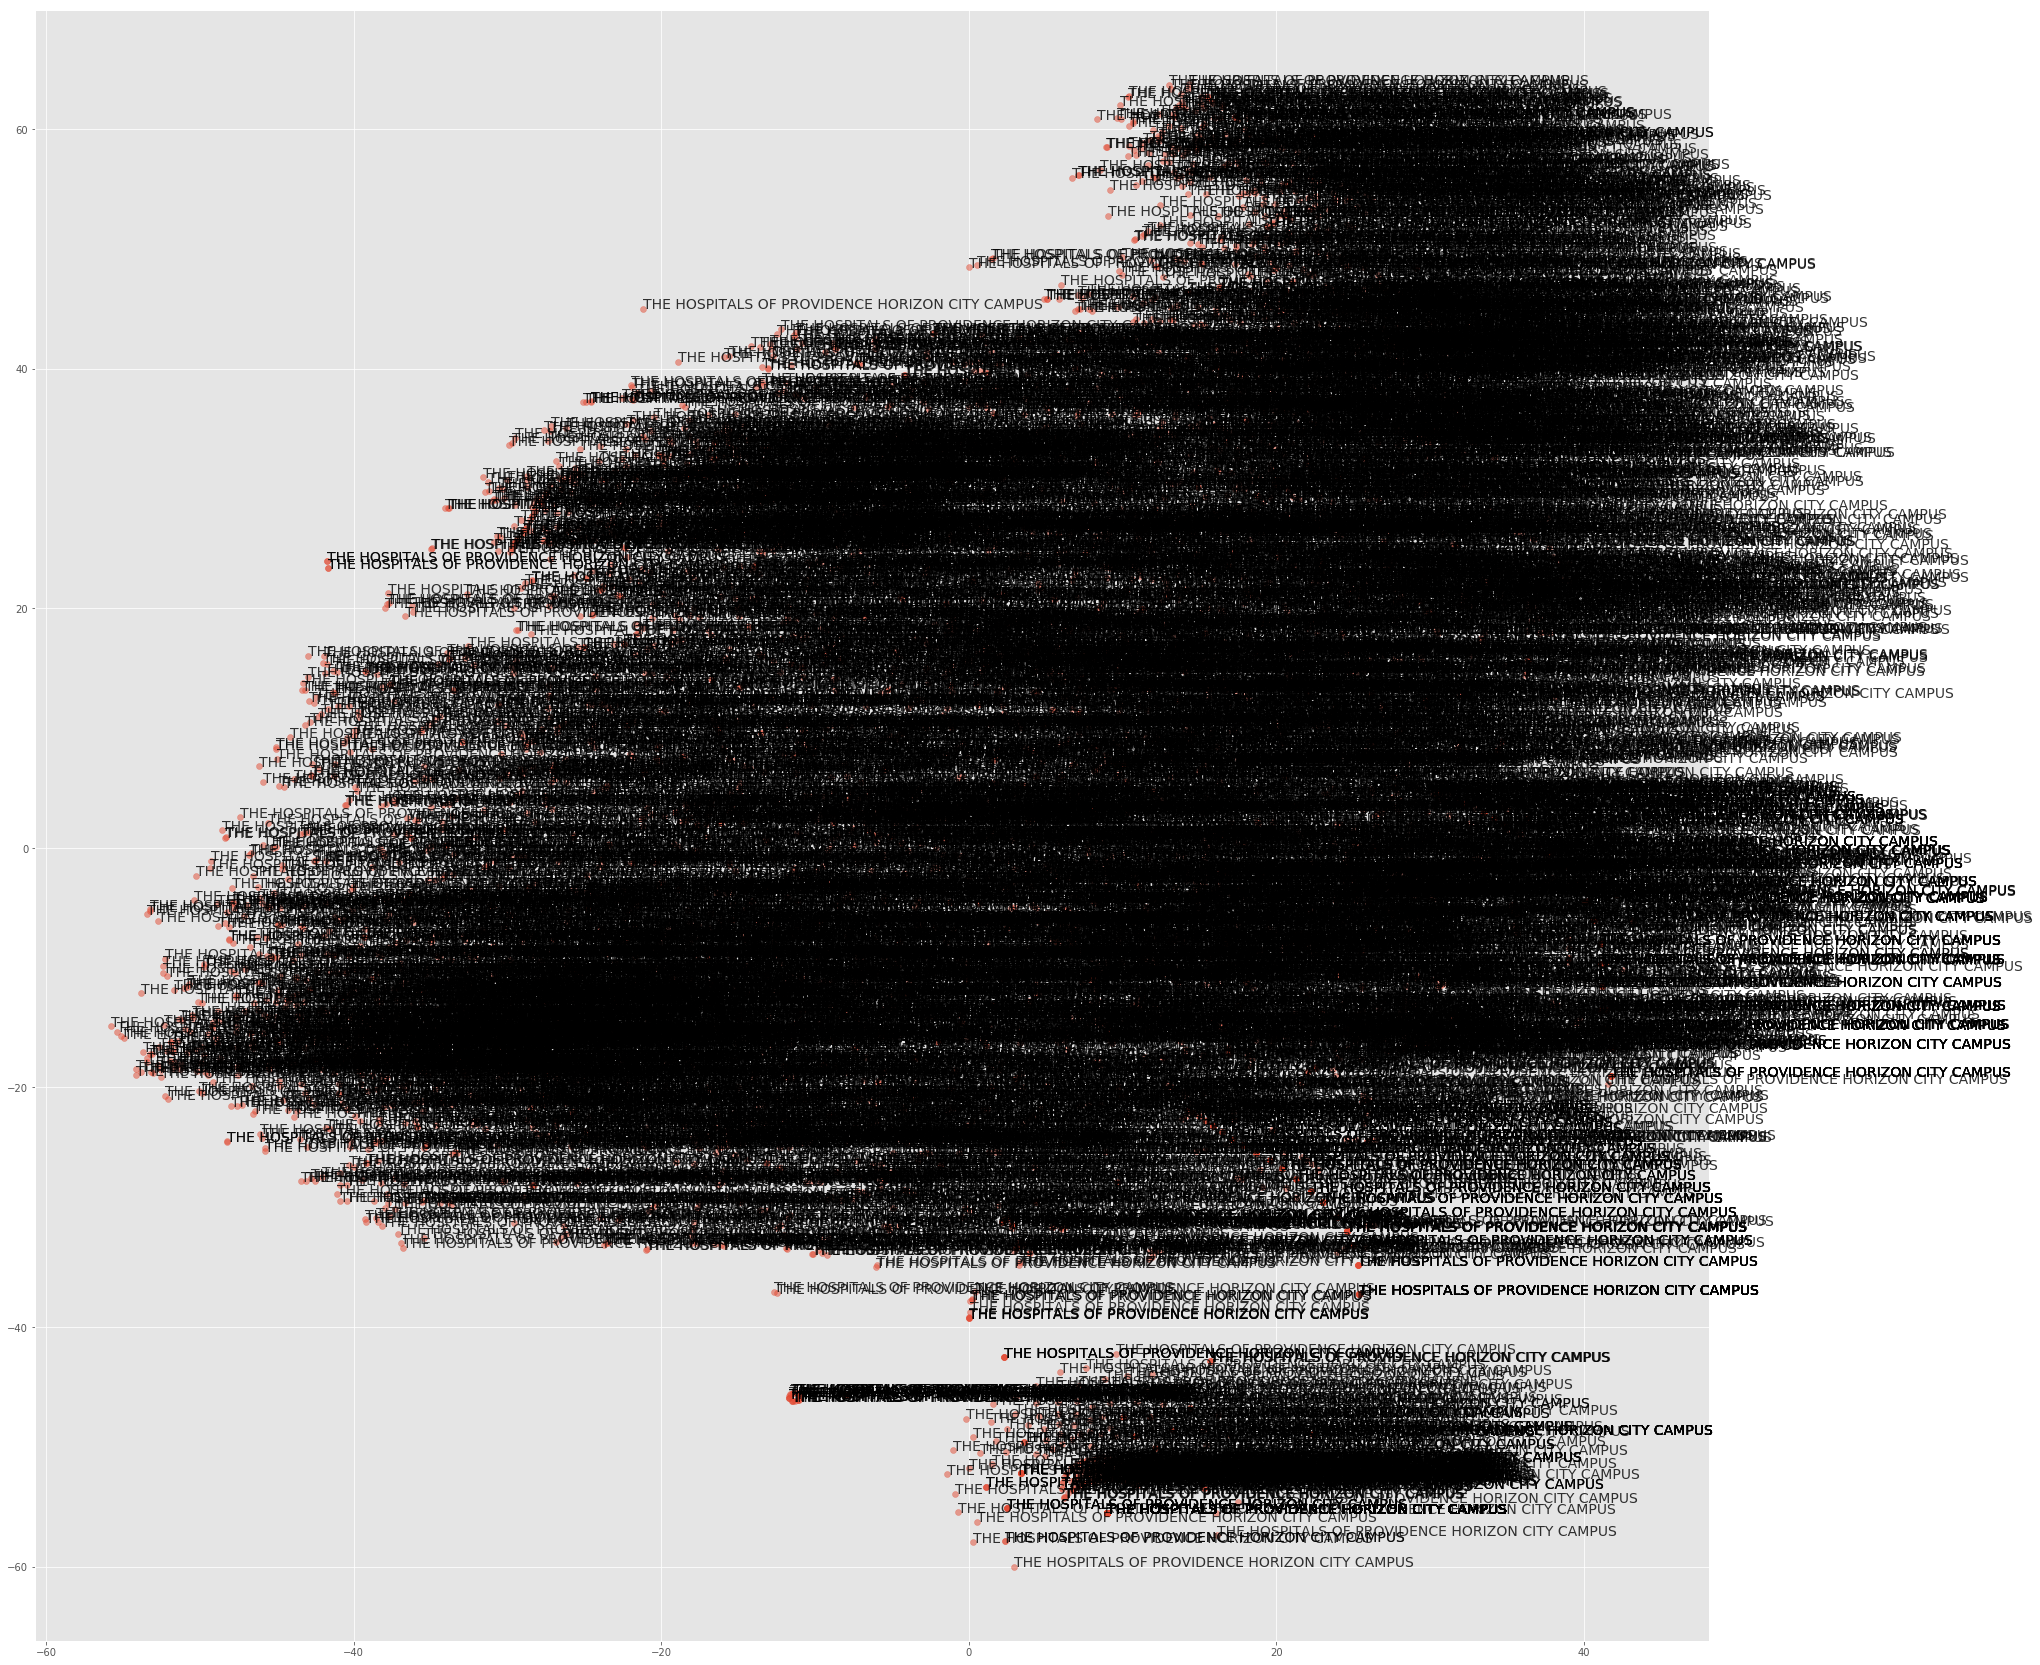

In [94]:
#Inspect the dataset via vizualization
plt.figure(figsize=(30,30))
# Select the 0th feature: xs
xs =Tsne_transformed[:,0]
# Select the 1th feature: ys
ys=Tsne_transformed[:,1]
# Scatter plot
plt.scatter(xs,ys, alpha=0.5)
for x, y in zip(xs, ys):
    plt.annotate(aircrafts, (x, y), fontsize=14, alpha=0.80)
plt.show()

[[ 1.05104864e+00  1.55111961e+00  2.94867432e+00 ... -1.94412204e+00
   8.65366224e-01 -1.11086510e+00]
 [ 1.05104864e+00  2.72566401e+00 -2.06245276e-15 ... -1.59591353e-01
   6.35249623e-01 -2.34944772e-02]
 [ 2.61488075e+00  2.02093737e+00 -7.00756711e-02 ... -1.58721590e+00
  -5.51001778e-02 -1.11086510e+00]
 ...
 [ 0.00000000e+00 -4.17281996e-15 -2.06245276e-15 ...  5.07194126e-15
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.17281996e-15 -2.06245276e-15 ...  9.11127059e-01
   8.65366224e-01  1.06387614e+00]
 [ 0.00000000e+00 -4.17281996e-15 -2.06245276e-15 ...  5.07194126e-15
   0.00000000e+00  0.00000000e+00]]


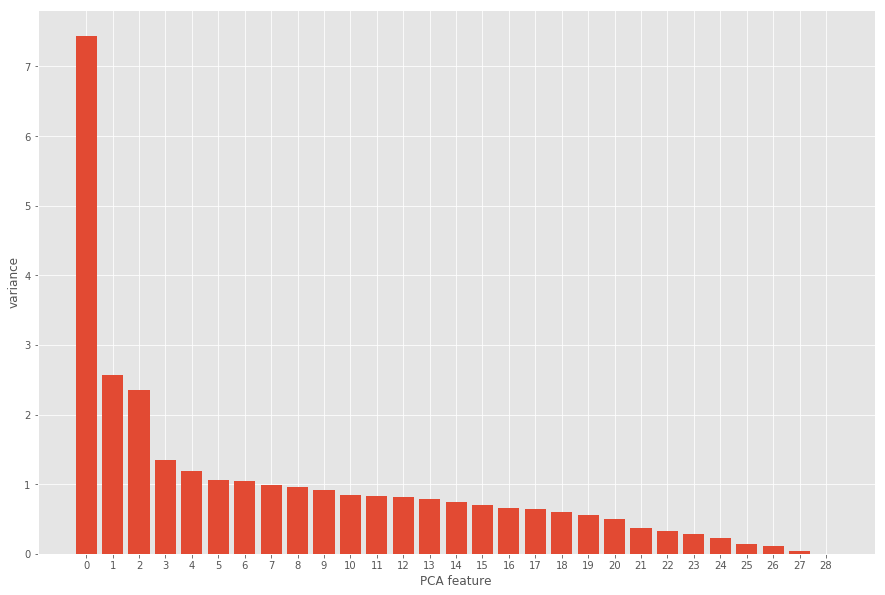

In [95]:
#PCA
#Import relevant libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(data) 
print(data) #shows percentage of each variance

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [96]:
# Create a PCA instance with 3 components: pca
pca = PCA(n_components=3)

# Fit the PCA instance to the scaled samples
pca.fit(data)

# Transform the scaled samples: pca_features
pca_features = pca.transform(data)

# Print the shape of pca_features
print(pca_features.shape)

(4944, 3)


Text(0.5,0,'PC3')

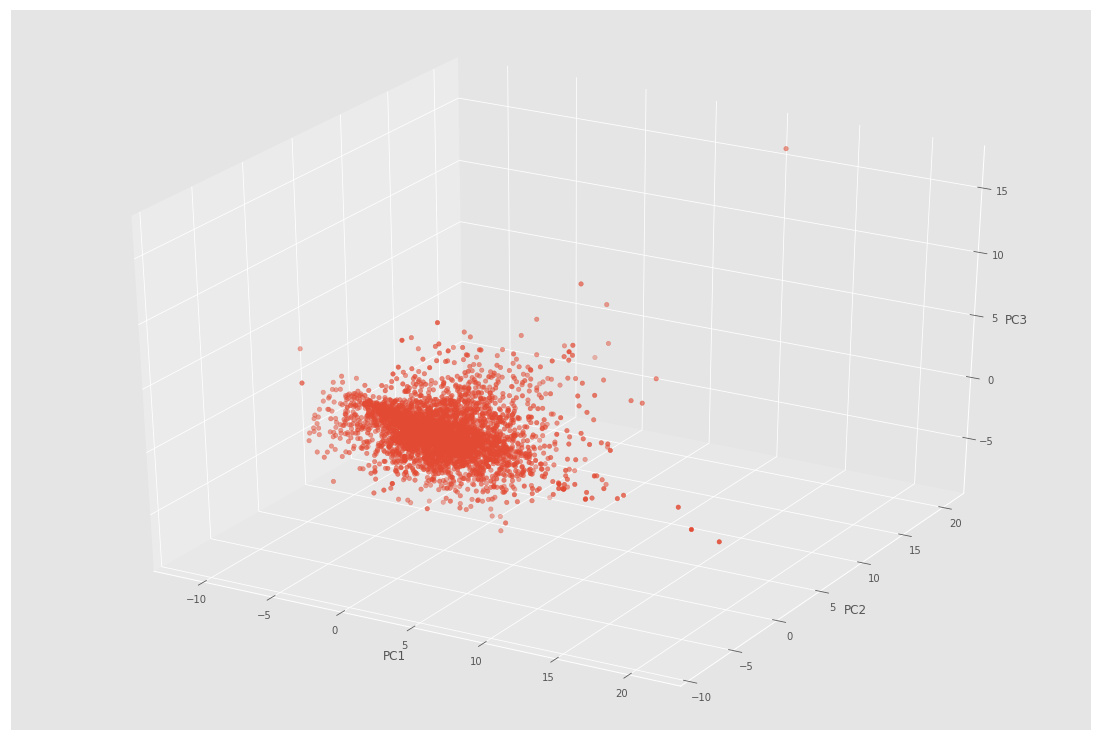

In [97]:
#Visualize the reduced dimensionality
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(pca_features[:, 0], pca_features[:, 1], pca_features[:, 2])

# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

In [98]:
#Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data)

array([1, 5, 1, ..., 4, 8, 4])

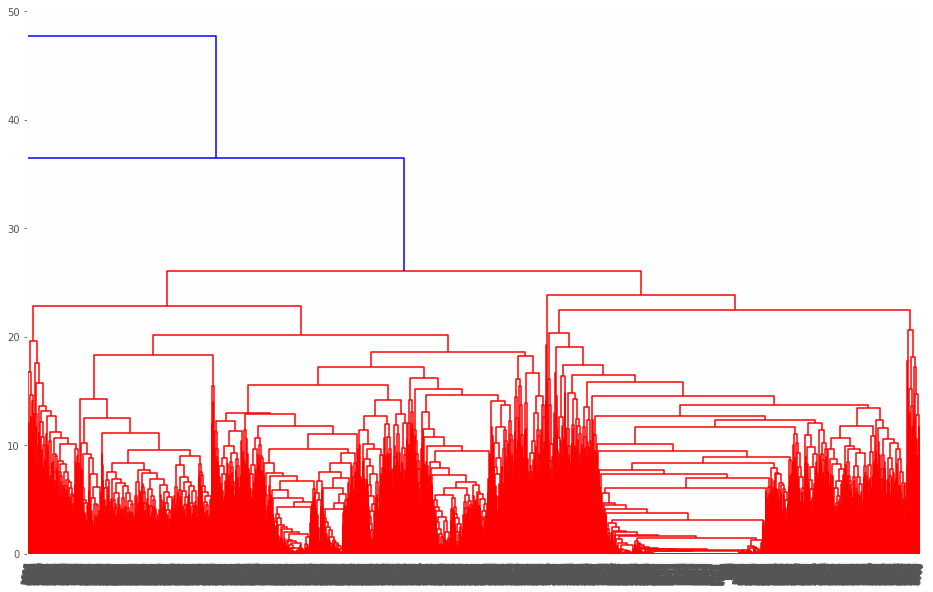

In [101]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(data, method='complete')
plt.figure(figsize=(16,10))
# Plot the dendrogram, using Hospital names as labels
dendrogram(mergings,
           leaf_rotation=80,
           leaf_font_size=9,
)

plt.show()